# Heart Disease Dataset


In [1]:
# import basic libraries
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Purples_r")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

%matplotlib inline

In [2]:
# import data into dataframe
df = pd.read_csv("heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# What is the shape of our data?
df.shape

(303, 14)

## Data Cleaning


In [4]:
# What kind of information do we have
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Most of the columns have names that don't make intuitive sense to me as I am not familiar which the cardiovascular system and heart diseases. As a result of this, I will be renaming the columns to names that make more sense to me.


In [5]:
columns = {"cp": "chest_pain_type",
           "trestbps": "rest_bp",
           "chol": "cholesterol",
           "fbs": "fasting_blood_sugar",
           "restecg": "rest_ecg",
           "thalach": "max_heart_rate",
           "exang": "exercise_angina",
           "oldpeak": "exercise_st_depression",
           "slope": "exercise_st_slope",
           "ca": "n_vessels_fluoro",
           "thal":"thalassemia"}
df = df.rename(columns, axis=1)
df.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_bp', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina',
       'exercise_st_depression', 'exercise_st_slope', 'n_vessels_fluoro',
       'thalassemia', 'target'],
      dtype='object')

Looking at the `thalassemia` column, it seems that both the data and the data explaination seems to have some sort to issue/error. As a result of this, I'll be removing it from the data.


In [6]:
df = df.drop("thalassemia", axis=1)
df.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_bp', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina',
       'exercise_st_depression', 'exercise_st_slope', 'n_vessels_fluoro',
       'target'],
      dtype='object')

In [7]:
# check missing values
df.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
rest_bp                   0
cholesterol               0
fasting_blood_sugar       0
rest_ecg                  0
max_heart_rate            0
exercise_angina           0
exercise_st_depression    0
exercise_st_slope         0
n_vessels_fluoro          0
target                    0
dtype: int64

In [8]:
np.isnan(df).any()

age                       False
sex                       False
chest_pain_type           False
rest_bp                   False
cholesterol               False
fasting_blood_sugar       False
rest_ecg                  False
max_heart_rate            False
exercise_angina           False
exercise_st_depression    False
exercise_st_slope         False
n_vessels_fluoro          False
target                    False
dtype: bool

In [9]:
# check datatypes
df.dtypes

age                         int64
sex                         int64
chest_pain_type             int64
rest_bp                     int64
cholesterol                 int64
fasting_blood_sugar         int64
rest_ecg                    int64
max_heart_rate              int64
exercise_angina             int64
exercise_st_depression    float64
exercise_st_slope           int64
n_vessels_fluoro            int64
target                      int64
dtype: object

It seems that there are no missing values and all values are the correct datatype.


In [10]:
# check for duplicated values
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [11]:
# There seems to be duplicate entries so I'll find which rows are duplicated
df[df.duplicated(keep=False)]

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,1


So it seems that there are two duplicated rows (163 and 164). I think it is highly unlikely that there would be two patients that have all 14 values that are the same. Especially as the entries are right after each other which leads me to believe that there was some sort of data entry error.


In [12]:
# removed duplicates
df = df.drop_duplicates()
df[df.duplicated(keep=False)]

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target


In [13]:
df.shape

(302, 13)

For now, I don't think there are any problems with the data.

## Data Exploration


### Data Dictionary

1. age - age of participant in years (Continuous)
2. sex - sex of participant (Boolean 0 = female, 1 = male)
3. chest_pain_type - chest pain type (Categorical 4 values: 0, 1, 2, 3)

    - 0: typical angina

    - 1: atypical angina

    - 2: non-anginal pain

    - 3: asymptomatic

4. rest_bp - resting blood pressure in mm Hg on admission (Continuous)
5. cholesterol - serum cholesterol in mg/dL (Continuous)
6. fasting_blood_sugar - fasting blood sugar > 120 mg/dL (Boolean)
7. rest_ecg - resting electrocardiographic results (Categorical 3 values 0,1,2)
8. max_heart_rate - maximum heart rate achieved (Continuous)
9. exercise_angina - exercise induced angina (Boolean)
10. exercise_st_depression - oldpeak = ST depression induced by exercise relative to rest (Continuous)
11. exercise_st_slope - the slope of the peak exercise ST segment (Categorical)
12. n_vessels_fluoro - number of major vessels (0-3) colored by fluoroscopy (Categorical)


In [14]:
# Is the target variable balanced?
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

For a binary classification problem, we need to make sure that our target categories are not highly unbalanced as that will skew our statistics and predictions.

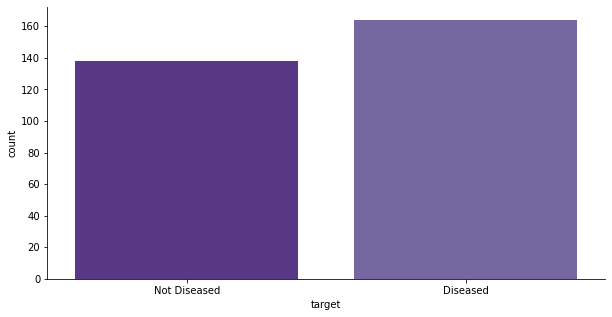

In [15]:
figure, ax = plt.subplots(figsize=(10,5))
sns.countplot(ax=ax, x=df["target"], label=["Not Diseased", "Diseased"])
ax.set_xticklabels(["Not Diseased", "Diseased"])
sns.despine()
plt.show()

In [16]:
num_no_disease = len(df[df["target"] == 0])
num_disease = len(df[df["target"] == 1])
num_rows = len(df)
print(f"Proportion of Not Diseased (target = 0): {num_no_disease * 100 / num_rows:.3f}%")
print(f"Proportion of Diseased (target = 1): {num_disease * 100 / num_rows:.3f}%")

Proportion of Not Diseased (target = 0): 45.695%
Proportion of Diseased (target = 1): 54.305%


### Basic EDA

In [17]:
df.describe()

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


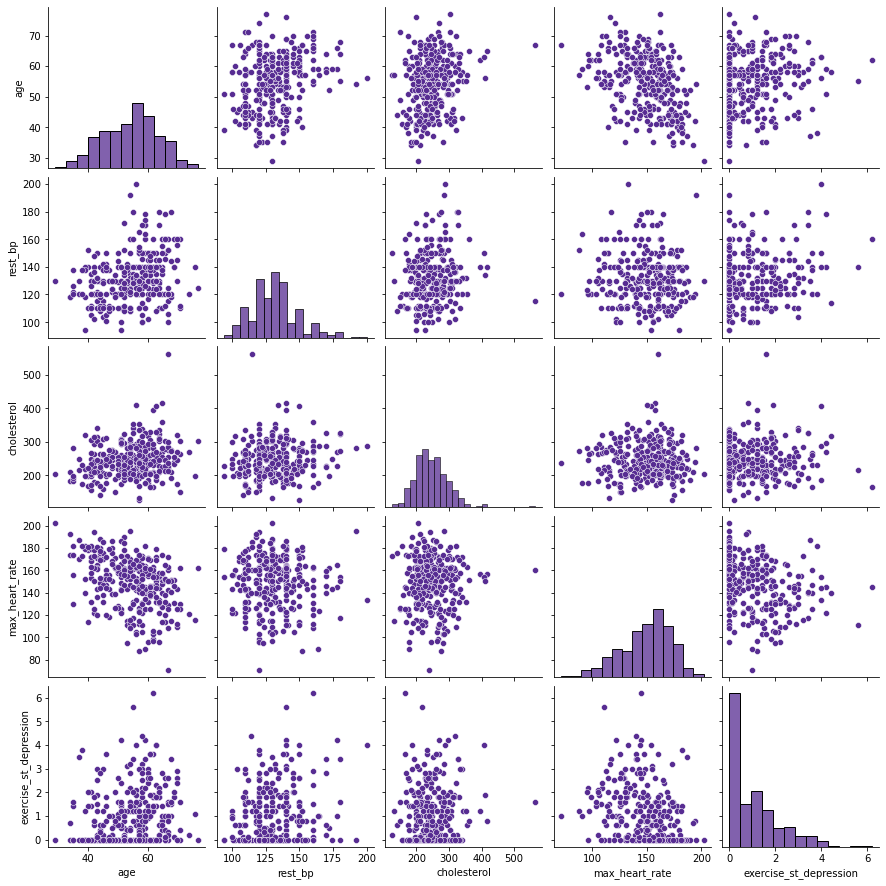

In [18]:
sns.pairplot(df[["age", "rest_bp", "cholesterol", "max_heart_rate", "exercise_st_depression"]])
sns.despine();

Looking at the scatterplots, it seems as though there are no obvious correlations between the different variables except for "max_heart_rate" and "age" which seems to have a weak negative linear correlation. Also, `exercise_st_depression` does not seem to be normally distributed.


In [19]:
# cross tab of age and target
ct = pd.crosstab(df["age"], df["target"])

# create a plotly graph object to compare age with heart disease
fig = go.Figure(data=[
    go.Bar(name='Not Diseased', x=ct.index,
           y=ct[0], text=ct[0], textposition="outside"),
    go.Bar(name='Diseased', x=ct.index,
           y=ct[1], text=ct[1], textposition="outside")
])
fig.update_layout(barmode='group',
                  colorway=["#3260a8", "#650086"],
                  height=600,
                  title={"text": "Distribution of Age and Heart Disease",
                         "x": 0.5,
                         "xanchor": "center"},
                  xaxis_title="Age",
                  yaxis_title="Count",
                  legend_title="Legend")
fig.update_xaxes(nticks=30)

fig.show()

In [20]:
# cross tab of sex and target
ct = pd.crosstab(df["sex"], df["target"]).rename(
    {0: "Female", 1: "Male"}, axis=0)

# create a plotly graph object to compare sex with heart disease
fig = go.Figure(data=[
    go.Bar(name='Not Diseased', x=ct.index,
           y=ct[0], text=ct[0], textposition="outside"),
    go.Bar(name='Diseased', x=ct.index,
           y=ct[1], text=ct[1], textposition="outside")
])
fig.update_layout(barmode='group',
                  colorway=["#3260a8", "#650086"],
                  title={"text": "Effect of Sex on Heart Disease",
                         "x": 0.5,
                         "xanchor": "center"},
                  xaxis_title="Sex",
                  yaxis_title="Count",
                  legend_title="Legend",
                  )

fig.show()

We see that in the age range of around 41 - 54, the proportion of people with heart disease seems greater than those without but in the age range of 55 - 67, the opposite seems true where the proportion of people without heart disease is greater. Also, when we compare the sex and heart disease, the proportion of females with heart disease is equal to $\frac{72}{24+72}=75\%$ while the proportion of males with heart disease is $\frac{92}{114+92}\approx44.66\%$.

These may indicate some sort of correlation, however, I'm a bit skeptical as it may just be due the how the data was collected and what data was collected.


In [21]:
from typing import Union
def plot_bar_graph(column_name: str) -> None:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.boxplot(ax=ax, x=df[column_name])
    sns.despine()
    plt.show()

def find_outliers(column_name: str) -> pd.DataFrame:
    lower_quartile = df[column_name].quantile(0.25)
    upper_quartile = df[column_name].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    return df.loc[(df[column_name] > upper_quartile + iqr * 1.5) | (df[column_name] < lower_quartile - iqr * 1.5)]

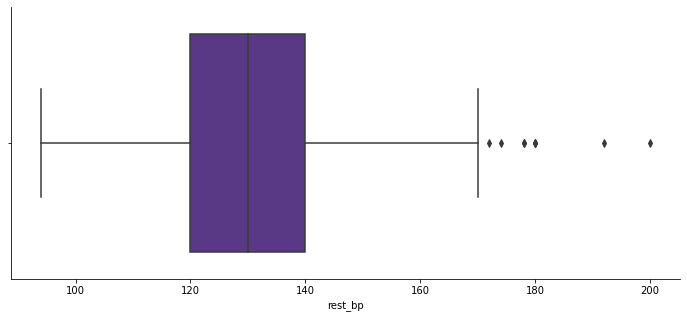

In [22]:
# Check possible outliers on the resting blood pressure
plot_bar_graph("rest_bp")

In [23]:
find_outliers("rest_bp")

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,0


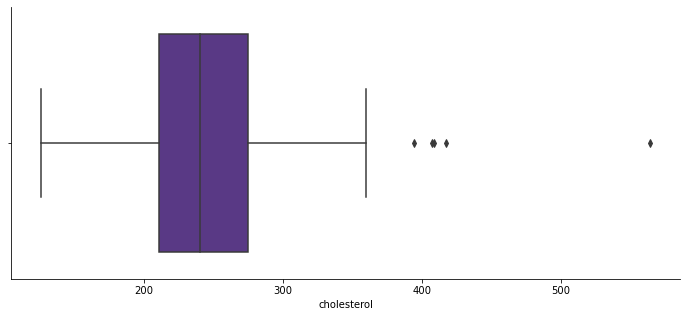

In [24]:
plot_bar_graph("cholesterol")

In [25]:
find_outliers("cholesterol")

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,0


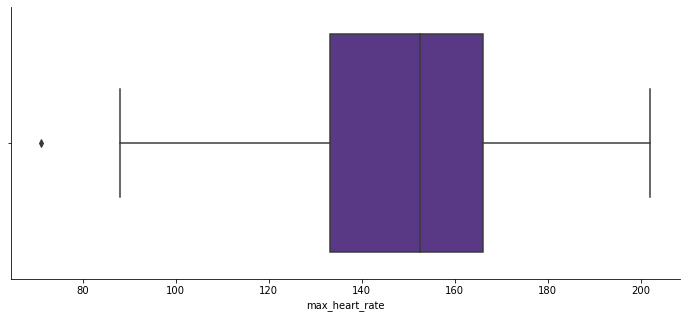

In [26]:
plot_bar_graph("max_heart_rate")

In [27]:
find_outliers("max_heart_rate")

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,0


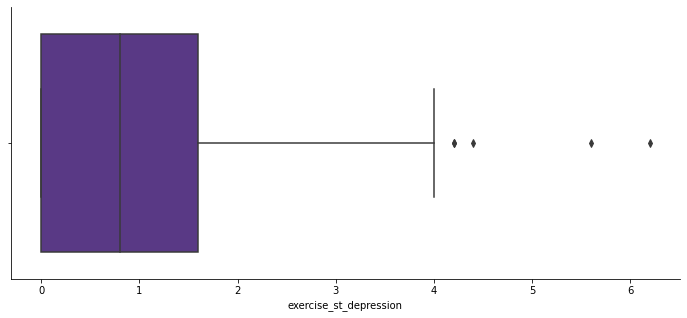

In [28]:
plot_bar_graph("exercise_st_depression")

In [29]:
find_outliers("exercise_st_depression")

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,0


In [30]:
# Find the point biserial correlation coefficient of the continuous variables and the target variable

from scipy.stats import pointbiserialr

correlations = []
p_values = []
for column in df.columns[:-1]:
    corr, p = pointbiserialr(df["target"], df[column])
    correlations.append(corr)
    p_values.append(p)
corrs = pd.DataFrame({"Column": df.columns[:-1], "Correlation Coefficient": correlations, "P-Value":p_values})
corrs.sort_values("Correlation Coefficient", inplace=True)
corrs.reset_index(drop=True, inplace=True)
corrs

,Column,Correlation Coefficient,P-Value
0,exercise_angina,-0.435601,2.046468e-15
1,exercise_st_depression,-0.429146,5.814567e-15
2,n_vessels_fluoro,-0.408992,1.317346e-13
3,sex,-0.283609,5.402436e-07
4,age,-0.221476,1.039484e-04
5,rest_bp,-0.146269,1.092654e-02
6,cholesterol,-0.081437,1.580370e-01
7,fasting_blood_sugar,-0.026826,6.424070e-01
8,rest_ecg,0.134874,1.903361e-02
9,exercise_st_slope,0.343940,8.221389e-10


It seems that none of the continuous features are highly correlated with heart disease but `exercise_angina` and `chest_pain_type` seem to have the greatest correlation.


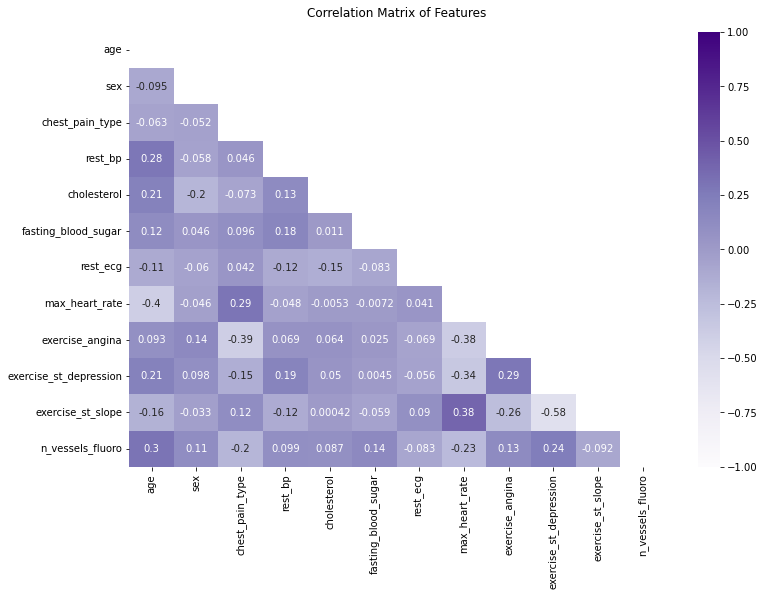

In [31]:
# Find and plot the correlations of the features

corr_matrix = df.iloc[:, :-1].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(ax=ax, data=corr_matrix, mask=mask, cmap="Purples", vmin=-1, vmax=1, annot=True)
ax.set_title("Correlation Matrix of Features", pad=15)
plt.show()

We can see from the correlation matrix that we have a few pairwise variables that have some sort of correlation ($\,|\rho_{X,Y}|\geq 0.3$). These are:

-   `age` and `max_heart_rate` (-0.4)
-   `age` and `n_vessels_fluoro`
-   `chest_pain_type` and `exercise_angina` (-0.39)
-   `max_heart_rate` and `exercise_angina` (-0.38)
-   `max_heart_rate` and `exercise_st_depression` (-0.34)
-   `max_heart_rate` and `exercise_st_slope` (0.38)
-   `exercise_st_depression` and `exercise_st_slope` (-0.58)

These may be useful for feature engineering later.


## Model Splitting

I will be using cross validation to train and tune hyperparameters for all the models. However, I would still like to split the data into a training and testing set where the training set will be further split for cross validation.


In [32]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing data
X = df.drop("target", axis=1)
y = df["target"]

# Stratify on the targets so that the training is not imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

y_train_props = y_train.value_counts(normalize=True).to_list()
print(f"Proportion of y_train data: 0 - {y_train_props[1]:.3f}, 1 - {y_train_props[0]:.3f}")
y_test_props = y_test.value_counts(normalize=True).to_list()
print(f"Proportion of y_test data : 0 - {y_test_props[1]:.3f}, 1 - {y_test_props[0]:.3f}")

X_train: (241, 12), y_train: (241,), X_test: (61, 12), y_test: (61,)
Proportion of y_train data: 0 - 0.456, 1 - 0.544
Proportion of y_test data : 0 - 0.459, 1 - 0.541


## Baseline Model Building

As this is a binary classification project, I'll only be looking at classification models. The ones I'll be using to create the baseline models will be:

-   Logistic regression model
-   Random Forest Classifier
-   K-Nearest Neighbours
-   Support Vector Machine
-   XGBoost Classifier

Initially, I'll be training these models without changing any hyperparameters or doing anything to the features. Afterwards, I'll try tuning some hyperparameters, feature engineering, and maybe even using a Voting Classifier to ensemble the models and see if that has any improvements.


In [33]:
# Create baseline model and evaluate function using accuracy
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

models = {"LogisticRegression": LogisticRegression(random_state=7),
          "RandomForest": RandomForestClassifier(random_state=7),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(random_state=7),
          "XGBoost": xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False)}

skf = StratifiedKFold(n_splits=10)
baseline = {}

for model_name, model in models.items():
    score = cross_val_score(model, X_train, y_train,
                            cv=skf, scoring="accuracy")
    baseline[model_name] = score.mean()

model_scores = pd.DataFrame({"Baseline": baseline.values()}, index=baseline.keys())
model_scores

C:\Users\Jeff\miniconda3\envs\HeartDisease\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Jeff\miniconda3\envs\HeartDisease\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Use

,Baseline
LogisticRegression,0.821000
RandomForest,0.825500
KNN,0.622000
SVC,0.650667
XGBoost,0.792667


## Model Improvement Time

So now that we have our base line models, I'll be trying my best to improve the models


### Feature Selection and Engineering
#### Standardising Continuous Variables

In [34]:
# Try using a column transformer to only standardise continuous variables
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


continuous_variables = ["age", "rest_bp", "cholesterol",
                        "max_heart_rate", "exercise_st_depression"]
cont_transformer = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((cont_transformer, continuous_variables), remainder="passthrough")

skf = StratifiedKFold(n_splits=10)
scores = {}

for model_name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    score = cross_val_score(pipe, X_train, y_train,
                            cv=skf, scoring="accuracy")
    scores[model_name] = score.mean()
model_scores["Standardised"] = scores.values()
model_scores


,Baseline,Standardised
LogisticRegression,0.821000,0.821167
RandomForest,0.825500,0.816833
KNN,0.622000,0.804667
SVC,0.650667,0.817000
XGBoost,0.792667,0.796833


So standardizing the numerical columns seemed to have improved most of the models except for the random forest classifier. 

<br>

#### One Hot Encoding Categorical Variables
I also want to try one hot encode the categorical features that are not dichromatic.


In [35]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ["chest_pain_type", "rest_ecg", "exercise_st_slope", "n_vessels_fluoro"]
cat_transformer = make_pipeline(OneHotEncoder())

preprocessor = make_column_transformer(
                                        (cat_transformer, categorical_variables),
                                        (cont_transformer, continuous_variables), 
                                        remainder="passthrough")

skf = StratifiedKFold(n_splits=10)
scores = {}

for model_name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    score = cross_val_score(pipe, X_train, y_train,
                            cv=skf, scoring="accuracy")
    scores[model_name] = score.mean()
model_scores["OHE + Standardised"] = scores.values()
model_scores


,Baseline,Standardised,OHE + Standardised
LogisticRegression,0.821000,0.821167,0.841833
RandomForest,0.825500,0.816833,0.796333
KNN,0.622000,0.804667,0.812833
SVC,0.650667,0.817000,0.829333
XGBoost,0.792667,0.796833,0.805167


With the one hot encoding, we get increased accuracy for all of the models (except random forest classifer) over just standardising.

#### Using Polynomial Features

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector

continuous_variables = ["age", "rest_bp", "cholesterol",
                        "max_heart_rate", "exercise_st_depression"]
cont_transformer = make_pipeline(StandardScaler())

categorical_variables = ["chest_pain_type", "rest_ecg", "exercise_st_slope", "n_vessels_fluoro"]
cat_transformer = make_pipeline(OneHotEncoder())

X_poly = X_train.copy()
for x in (poly_variables := categorical_variables[1:]):
    X_poly[x + "_copy"] = X_train[x]
poly_transformer = make_pipeline(PolynomialFeatures(interaction_only=True), StandardScaler())

preprocessor = make_column_transformer(
                                        (cat_transformer, categorical_variables),
                                        (cont_transformer, continuous_variables),
                                        (poly_transformer, make_column_selector(pattern=r".+_copy")),
                                        remainder="passthrough")

skf = StratifiedKFold(n_splits=10)
scores = {}

for model_name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    score = cross_val_score(pipe, X_poly, y_train,
                            cv=skf, scoring="accuracy")
    scores[model_name] = score.mean()
model_scores["Polynomial"] = scores.values()
model_scores


,Baseline,Standardised,OHE + Standardised,Polynomial
LogisticRegression,0.821000,0.821167,0.841833,0.817000
RandomForest,0.825500,0.816833,0.796333,0.800500
KNN,0.622000,0.804667,0.812833,0.775833
SVC,0.650667,0.817000,0.829333,0.780167
XGBoost,0.792667,0.796833,0.805167,0.801000


Using polynomial features doesn't seem to work very well so I won't be using it as a feature engineering tool for this dataset.

## Hyperparameter Tuning
Now it's time to move onto hyperparameter tuning for each model. All of the models except for the random forest classifier will be using the one hot encoding + standardisation pipeline whereas the random forest classifier will just use the original training dataset.

In [37]:
continuous_variables = ["age", "rest_bp", "cholesterol",
                        "max_heart_rate", "exercise_st_depression"]
cont_transformer = make_pipeline(StandardScaler())

categorical_variables = ["chest_pain_type", "rest_ecg", "exercise_st_slope", "n_vessels_fluoro"]
cat_transformer = make_pipeline(OneHotEncoder())

preprocessor = make_column_transformer(
                                        (cat_transformer, categorical_variables),
                                        (cont_transformer, continuous_variables),
                                        remainder="passthrough")

skf = StratifiedKFold(n_splits=10)

### K-Nearest Neighbours

In [38]:
# Find optimal k-value for original hyperparameters
k_list = list(range(1, 21))
k_scores = []

for k in k_list:
    pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k, n_jobs=-1))
    k_scores.append(cross_val_score(pipe, X_train, y_train, cv=skf, scoring="accuracy").mean())


In [39]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=k_list, y=k_scores,
                         line={"color": 'purple', "width":3}))

fig.update_layout(title={"text": "Accuracy for each k value",
                         "x": 0.5,
                         "xanchor": "center"},
                  xaxis_title="k value",
                  yaxis_title="Accuracy",
                  )

fig.update_yaxes(range=[0.75, 0.84])
fig.show()

In [51]:
print(f"The k value with the highest accuracy is {k_list[k_scores.index(max(k_scores))]} with an accuracy of {max(k_scores)}.")

The k value with the highest accuracy is 6 with an accuracy of 0.8251666666666667.


To find the best combination of hyperparameters, I will use `GridSearchCV` to exhaustively try out each combination.

In [50]:
# Tune other hyperparameters for the KNN model
from sklearn.model_selection import GridSearchCV

params = {}
params["kneighborsclassifier__n_neighbors"] = k_list
params["kneighborsclassifier__weights"] = ["uniform", "distance"]
params["kneighborsclassifier__metric"] = ["minkowski", "manhattan", "euclidean"]

pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_jobs=-1))

grid_search = GridSearchCV(pipe, param_grid=params, cv=skf, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_score_

0.8336666666666666

In [44]:
grid_search.best_params_

{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 11,
 'kneighborsclassifier__weights': 'distance'}

So it seems like the best parameters for a KNN model are `{'metric': 'manhattan',
 'n_neighbors': 11,
 'weights': 'distance'}` with an accuracy of `0.8336666666666666`

### Random Forest Classifier

As the number of potential combinations of hyperparameters increase, I will use `RandomizedSearchCV` to narrow the hyperparameter combinations before using `GridSearchCV`.

In [57]:
from sklearn.model_selection import RandomizedSearchCV

params = {}
params["randomforestclassifier__bootstrap"] = [True, False]
params["randomforestclassifier__max_depth"] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
params["randomforestclassifier__max_features"] = ["auto", "sqrt", "log2", None]
params["randomforestclassifier__min_samples_split"] = [2, 5, 10]
params["randomforestclassifier__min_samples_leaf"] = [1, 2, 4]
params["randomforestclassifier__n_estimators"] = [100, 150, 200, 400, 600, 800, 1000]


pipe = make_pipeline(RandomForestClassifier(random_state=7))

grid_search = RandomizedSearchCV(pipe, param_distributions=params, cv=skf, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_score_

0.8215

### Logistic Regression


### SVC


### XGBoost